In [1]:
# tutorial: https://towardsdatascience.com/real-time-face-recognition-an-end-to-end-project-b738bb0f7348

In [5]:
# imports

import os
import pathlib
from pathlib import Path
import time
from datetime import datetime
# use this Python library to load your variables
from dotenv import load_dotenv
load_dotenv()
print("Env vars loaded.")

import shutil

import numpy as np
from matplotlib import pyplot as plt

Env vars loaded.


In [6]:
import cv2 as cv2
print("cv2 version:", cv2.__version__)
from PIL import Image


cv2 version: 4.6.0


In [3]:
# Tesing camera
def test_camera():
    cap = cv2.VideoCapture(0)
    cap.set(3,640) # set Width
    cap.set(4,480) # set Height
    while(True):
        ret, frame = cap.read()
        #frame = cv2.flip(frame, -1) # Flip camera vertically
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('frame', frame)
        cv2.imshow('gray', gray)

        k = cv2.waitKey(30) & 0xff
        if k == 27: # press 'ESC' to quit
            break
    cap.release()
    cv2.destroyAllWindows()
    
test_camera()

In [24]:
# Testing video recording
def capture_vid():
    # https://github.com/Mjrovai/OpenCV-Face-Recognition/blob/master/FaceDetection/faceDetection.py
    '''
    Haar Cascade Face detection with OpenCV  
        Based on tutorial by pythonprogramming.net
        Visit original post: https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/  
    Adapted by Marcelo Rovai - MJRoBot.org @ 7Feb2018 
    '''

    # Multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades
    faceCascade = cv2.CascadeClassifier(str(Path('cv2_Cascades') / 'haarcascade_frontalface_default.xml'))

    cap = cv2.VideoCapture(0)
    cap.set(3,640) # set Width
    cap.set(4,480) # set Height

    while True:
        ret, img = cap.read()
        #img = cv2.flip(img, -1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # faceCascade.detectMultiScale: detects faces in img.
        # Params:
        # @scaleFactor: from "https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/": ScaleFactor determines the factor of increase in window size which initially starts at size “minSize”, and after testing all windows of that size, the window is scaled up by the “scaleFactor”, and the window size goes up to “maxSize”. If the “scaleFactor” is large, (e.g., 2.0), there will be fewer steps, so detection will be faster, but we may miss objects whose size is between two tested scales. (default scale factor is 1.3)
        # @minNeighbors: from "https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/": Higher the values of the “minNeighbors”, less will be the number of false positives, and less error will be in terms of false detection of faces. However, there is a chance of missing some unclear face traces as well.
        # @minSize: min Dims of a rectangle to be considered as a face if classified so
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.2,
            minNeighbors=5, # Specifies how many neighbors each candidate rectangle should have, to retain it. A higher number gives lower false positives.
            minSize=(20, 20)
        )

        # Draw rectangles on image components when containing face(s): 
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            # keep updating the real-time capture
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]


        cv2.imshow('video',img)

        k = cv2.waitKey(30) & 0xff
        if k == 27: # press 'ESC' to quit
            break

    cap.release()
    cv2.destroyAllWindows()

In [25]:
#capture_vid()

In [9]:
# Create gray-scale user photos dataset
def create_gs_user_photos_ds(user_id):
    """Create a dataset of user face images using real time capturing

    Parameters
    ----------
    user_id: int
        The id of the user we are creating the face ds for

    Returns
    -------
    None
    """
    
    gs_ds_dir = Path("imgs") / "user_photos" / "gs"
    
    # Remove previous ds if exists and create a new empty one.
    try:
        shutil.rmtree(gs_ds_dir)
    except:
        pass
    os.mkdir(gs_ds_dir)
    
    try:
    
        cam = cv2.VideoCapture(0)
        cam.set(3, 640) # set video width
        cam.set(4, 480) # set video height
        face_detector = cv2.CascadeClassifier(str(Path('cv2_Cascades') / 'haarcascade_frontalface_default.xml'))

        print("[INFO] Initializing face capture. Look the camera and wait. Press 's' to save a frame and 'ESC' to stop...")
        # Initialize individual sampling face count
        count = 0
        while(True):
            ret, img = cam.read()
            #img = cv2.flip(img, -1) # flip video image vertically
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_detector.detectMultiScale(gray, 1.3, 5)
            for (x,y,w,h) in faces:
                cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
                
            cv2.imshow('image', img)

            k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video 
            if k == ord('s'): # press "s" to save face from current frame
                count += 1
                # Save the captured image into the datasets folder
                cv2.imwrite(Path(gs_ds_dir) / "User.{0}.{1}.jpg".format(user_id, count), gray[y:y+h,x:x+w])
                
            elif k == 27: # if ESC is pressed
                break
            elif count >= 30: # Take 30 face sample and stop video
                 break
    except Exception as ex:
        print("[Error]:", ex)
        
    finally:
        # Do a bit of cleanup
        print("\n [INFO] Exiting Program and cleanup stuff")
        cam.release()
        cv2.destroyAllWindows()
    
    return None

In [11]:
#create_gs_user_photos_ds(user_id = 1)

In [28]:
# Create gray scale photos from already existing photos (without real time cammera)
def create_gray_user_photos_ds():
    
    photos_dir = Path("imgs") / "user_photos"
    gray_photos_dir = Path(photos_dir) / "nrt-gs" #non-real time gray-scale
    
    # Remove previous conversion output and create a new empty one.
    try:
        shutil.rmtree(gray_photos_dir)
    except:
        pass
    os.mkdir(gray_photos_dir)
    
    filenames = os.listdir(photos_dir)
    i = 0
    for filename in filenames:
        
        # take file with "jpg", "jpeg", "png" extension only
        if filename.split(".")[-1].lower() not in ["jpg", "jpeg", "png"]:
            continue
        
        filepath = Path(photos_dir) / filenames
        
        img = cv2.imread(filepath, 0)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(filepath, gray)
        
        i += 1
        
    print("Converted {0} user photos to gray scale".format(i))

In [29]:
create_gray_user_photos_ds()

Converted 0 user photos to gray scale


In [42]:
def face_rec_train(face_gs_imgs_dir):
    """Train CV2 classifier on face imgs dataset

    Parameters
    ----------
    face_gs_imgs_dir: str
        The path to the dir containing face imgs ds

    Returns
    -------
    None
    """
    
    # Path for face image database
    path = face_gs_imgs_dir
    # Use LOCAL BINARY PATTERNS HISTOGRAMS for face recognition by creating a representation of the texture pattern in the neighberhood 
    # to read more: https://www.geeksforgeeks.org/face-recognition-with-local-binary-patterns-lbps-and-opencv/
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    detector = cv2.CascadeClassifier(str(Path('cv2_Cascades') / 'haarcascade_frontalface_default.xml'))
    
    # function to get the images and label data
    def getImagesAndLabels(path):
        imagePaths = [f for f in path.glob("*.jpg")]     
        faceSamples=[]
        ids = []
        for imagePath in imagePaths:
            print(str(path))
            print(str(imagePath))
            PIL_img = Image.open(imagePath).convert('L') # grayscale
            img_numpy = np.array(PIL_img,'uint8')
            id = int(os.path.split(imagePath)[-1].split(".")[1]) # filename has patter: User.[user_id].[photo_num].jpg
            faces = detector.detectMultiScale(img_numpy)
            for (x,y,w,h) in faces:
                faceSamples.append(img_numpy[y:y+h,x:x+w])
                ids.append(id)
        return faceSamples,ids
    
    print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
    faces,ids = getImagesAndLabels(path)
    recognizer.train(faces, np.array(ids))
    # Save the model into trainer/trainer.yml
    recognizer.write(str(Path('face_trainer') / 'trainer.yml'))
    # Print the numer of faces trained and end program
    print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))
    
    return None

In [43]:
usr_photos_gs_ds_dir = Path("imgs") / "user_photos" / "gs"
face_rec_train(usr_photos_gs_ds_dir)


 [INFO] Training faces. It will take a few seconds. Wait ...
imgs/user_photos/gs
imgs/user_photos/gs/User.1.12.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.20.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.19.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.1.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.7.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.18.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.24.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.21.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.27.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.8.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.29.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.6.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.14.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.15.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.30.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.4.jpg
imgs/user_photos/gs
imgs/user_photos/gs/User.1.16.jpg
imgs/user_photos/gs
imgs/

# real-time recognizer

In [46]:
def validate_face_realtime():
    """Validates User's face in real-time camera capturing using our trained CV2 classifier


    Returns
    -------
    bool
        A value indidcates if the user is found in the frame
    """
    
    user_validated = False

    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read(str(Path('face_trainer') / 'trainer.yml'))
    faceCascade = cv2.CascadeClassifier(str(Path('cv2_Cascades') / 'haarcascade_frontalface_default.xml'))
    font = cv2.FONT_HERSHEY_SIMPLEX
    # Iniciate id counter
    id = 0
    # names related to ids: example ==> Omar: id=1,  etc. In this function it must always be 1 (Omar)
    names = ['User_0', 'Omar', 'User_1']

    try:
        # Initialize and start realtime video capture
        cam = cv2.VideoCapture(0)
        cam.set(3, 640) # set video widht
        cam.set(4, 480) # set video height
        # Define min window size to be recognized as a face
        minW = 0.1*cam.get(3)
        minH = 0.1*cam.get(4)
        while True:
            ret, img =cam.read()
            #img = cv2.flip(img, -1) # Flip vertically
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            faces = faceCascade.detectMultiScale( 
                gray,
                scaleFactor = 1.2,
                minNeighbors = 5,
                minSize = (int(minW), int(minH)),
               )
            for(x,y,w,h) in faces:
                cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
                id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

                # If confidence is less them 100 ==> "0" : perfect match 
                if (confidence < 100):
                    id = names[id]
                    confidence = "  {0}%".format(round(100 - confidence))
                    
                    if not user_validated: # print only once
                        print("Good Job! Face validated!")
                        print("[Info] Press Esc to end.")
                        user_validated = True
                    
                else:
                    id = "unknown"
                    confidence = "  {0}%".format(round(100 - confidence))

                cv2.putText(
                            img, 
                            str(id), 
                            (x+5,y-5), 
                            font, 
                            1, 
                            (255,255,255), 
                            2
                           )
                cv2.putText(
                            img, 
                            str(confidence), 
                            (x+5,y+h-5), 
                            font, 
                            1, 
                            (255,255,0), 
                            1
                           )

            cv2.imshow('camera',img) 
            k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
            if k == 27:
                break
    except Exception as ex:
        print("[Error]:", ex)
    finally:
        # Do a bit of cleanup
        print("\n [INFO] Exiting Program and cleanup stuff")
        cam.release()
        cv2.destroyAllWindows()
        
    return user_validated

In [47]:
validate_face_realtime()

Good Job! Face validated!
[Info] Press Esc to end.

 [INFO] Exiting Program and cleanup stuff


True

In [61]:
def validate_face_in_img(captured_img_path, val_usr_name, plot=False):
    """Validates User's face in a saved photo using our trained CV2 classifier

    Parameters
    ----------
    captured_img_path: str
        The path to the saved captured image for the user in front of validation place.
    val_usr_name: str
        The name of the user we are validating in the captured image
    plot: bool, optional
        A flag to set if we want to plot face validation output image

    Returns
    -------
    user_validated: bool
        Wether the user is validated
    msg: str:
        The validation output msg
    """
    
    # Convert pathlib.Path to str
    img_path = str(captured_img_path)
    # Debugging
    #print("> Image:", img_path)

    user_validated = False

    recognizer = cv2.face.LBPHFaceRecognizer_create()
    trainer_path = Path('face_trainer') / 'trainer.yml'
    recognizer.read(str(trainer_path))
    faceCascade = cv2.CascadeClassifier(str(Path('cv2_Cascades') / 'haarcascade_frontalface_default.xml'))
    font = cv2.FONT_HERSHEY_SIMPLEX
    #iniciate id counter
    id = 0
    # names related to ids: example ==> Omar: id=1,  etc
    names = ['User_0', 'Omar']
    
    # read img from path and convert it into Numpy array in gray scale
    img = cv2.imread(img_path)
    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (15, 15),
       )
    
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 4)
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

        # If confidence is less them 100 ==> "0" : perfect match 
        if (confidence < 100):
            user_name = names[id]
            if user_name == val_usr_name:
                confidence = "  {0}%".format(round(100 - confidence))
                user_validated = True
            else:
                id = "unknown"
                confidence = "  {0}%".format(round(100 - confidence))

        else:
            id = "unknown"
            confidence = "  {0}%".format(round(100 - confidence))

        cv2.putText(
                    img, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    img, 
                    str(confidence), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )  
        
    if user_validated:
        msg = "\t- Good Job! {0}'s face validated!".format(val_usr_name)
    else:
        msg = "\t- Can't find {0} in the image".format(val_usr_name)
        
    if plot:
        # Change BGR to RGB for plotting
        img = img[...,::-1]
        # Show validation rectangle and label
        plt.imshow(img)
        plt.show()

    return user_validated, msg

In [63]:
# Testing validate_face_in_img(...)

val_usr_name = "Omar"
captured_imgs_dir = Path("imgs") / "captured"
captured_img_filenames = captured_imgs_dir.glob("*.*")
for img_filename in captured_img_filenames:
    captured_img_path = img_filename
    # Only accept .jpg, .jpeg, .png extensions
    if not captured_img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
        continue
    print("> Capture img:", captured_img_path)
    user_face_validated, msg = validate_face_in_img(captured_img_path, val_usr_name)
    print("\t-", "Face validated" if user_face_validated else "Face NOT validated", " - [Msg]", msg)

> Capture img: imgs/captured/1719395070404.jpg
	- Face validated  - [Msg] 	- Good Job! Omar's face validated!
> Capture img: imgs/captured/1719395070417.jpg
	- Face validated  - [Msg] 	- Good Job! Omar's face validated!
> Capture img: imgs/captured/1719395070429.jpg
	- Face validated  - [Msg] 	- Good Job! Omar's face validated!
> Capture img: imgs/captured/1719395070390.jpg
	- Face NOT validated  - [Msg] 	- Can't find Omar in the image


In [68]:
# Tutorial from OpenCV: https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html
def check_bg_similarity(captured_img_path, plc_id, plot = False):
    """Validates User's face in a saved photo using our trained CV2 classifier

    Parameters
    ----------
    captured_img_path: str
        The path to the saved captured image for the user in front of validation place.
    plc_id: str
        The id of the place (Google Place) with which we want to check image similarity
    plot: bool, optional
        A flag to set if we want to plot background similarity output image

    Returns
    -------
    bg_similar: bool
        Wether the captured image and the Google Places image for the selected place are similar enough
    msg: str:
        The similarity check output msg
    """
    
    # Convert pathlib.Path to str
    captured_img_path = str(captured_img_path)
    # Debugging
    #print("> Image:", captured_img_path)
    
    bg_similar = False
    msg = ""
    
    MAX_DISTANCE_THRESH = 0.70
    MIN_MATCH_COUNT = 10
    
    # Read visited place img, the one we have saved from Google Places while choosing today's plan in grayscale
    plc_img_path = str(Path("imgs") / "plc_{0}.jpg".format(plc_id))
    img_plc = cv2.imread(plc_img_path, cv2.IMREAD_GRAYSCALE) # queryImage
    
    # Read captured img in gray scale
    img_cap = cv2.imread(captured_img_path, cv2.IMREAD_GRAYSCALE) # trainImage
    img_cap = cv2.flip(img_cap, 1) # flip horizontally to original
    
    # Scale img_cap (usually much larger than img_plc)
    img_plc_h, img_plc_w = img_plc.shape
    img_cap_h, img_cap_w = img_cap.shape
    
    # Calculate scaling factors
    h_s_f = round(img_plc_h / img_cap_h, 2)
    w_s_f = round(img_plc_w / img_cap_w, 2)
    
    img_cap = cv2.resize(img_cap, (0,0), fx=h_s_f, fy=w_s_f) 
    
    # Initiate SIFT detector
    sift = cv2.SIFT_create()
    
    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img_plc, None)
    kp2, des2 = sift.detectAndCompute(img_cap, None)
    
    # Set algorithm parameters
    FLANN_INDEX_KDTREE = 1
    N_TREES = 5
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = N_TREES)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    # Find matches
    matches = flann.knnMatch(des1, des2, k=2) # matching between (2) points
    
    # Store all the good matches as per Lowe's ratio test.
    good_matches = []
    for m, n in matches:
        if m.distance < (MAX_DISTANCE_THRESH * n.distance):
            good_matches.append(m)
    
    enough_matches = len(good_matches) >= MIN_MATCH_COUNT
    
    if plot:

        # If enough matches are found, we extract the locations of matched keypoints in both the images.
        # Then, we pass them to find the perspective transformation. Once we get this 3x3 transformation 
        # matrix, we use it to transform the corners of queryImage to corresponding points in trainImage then
        # we draw it.
        
        try:
            
            src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
            dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

            M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
            matchesMask = mask.ravel().tolist()
            h,w = img_plc.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts,M)
            img_cap = cv2.polylines(img_cap,[np.int32(dst)],True,255,3, cv2.LINE_AA)

            # Finally we draw our inliers (if successfully found the object) or matching keypoints (if failed).
            draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                singlePointColor = None,
                matchesMask = matchesMask, # draw only inliers
                flags = 2
            )
        except:
            # Init as empty dict
            draw_params = dict()
        
        img_marks = cv2.drawMatches(img_plc, kp1, img_cap, kp2, good_matches, None, **draw_params)
        plt.imshow(img_marks, 'gray'),plt.show()
        
    # Set a condition that at least MIN_MATCH_COUNT matches are to be there to find the object. Otherwise simply show a message saying not enough matches are present.
    if enough_matches:
        bg_similar = True
        msg = "Place validated - {0} good landmark matches.".format(len(good_matches))
    else:
        bg_similar = False
        msg = "Not enough landmark matches are found - {}/{}".format(len(good_matches), MIN_MATCH_COUNT)

    return bg_similar, msg

> Capture img: imgs/captured/1719395070404.jpg


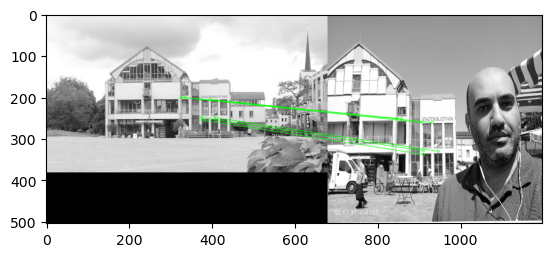

- Place validated - 16 good landmark matches.
> Capture img: imgs/captured/1719395070417.jpg


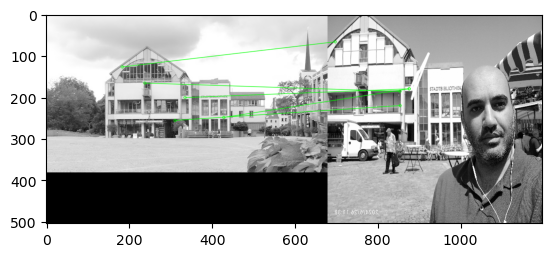

- Place validated - 13 good landmark matches.
> Capture img: imgs/captured/1719395070429.jpg


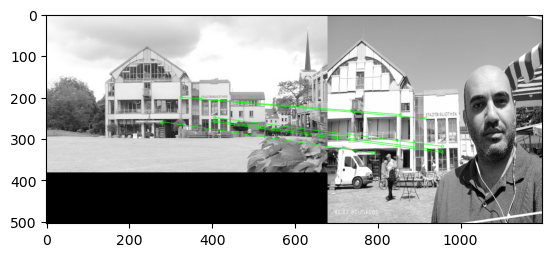

- Place validated - 15 good landmark matches.
> Capture img: imgs/captured/1719395070390.jpg


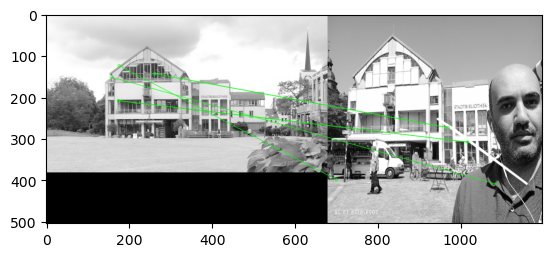

- Place validated - 17 good landmark matches.


In [70]:
# Testing check_bg_similarity(...) with SIMILAR BG
plc_id = "ChIJo7uyXuVHvUcRJnq0SFwXuGc" # Stadt Biblioteck
captured_imgs_dir = Path("imgs") / "captured"
captured_img_filepaths = captured_imgs_dir.glob("*.*")
for captured_img_path in captured_img_filepaths:
    # Only accept .jpg, .jpeg, .png extensions
    if not captured_img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
        continue
    print("> Capture img:", captured_img_path)
    bg_similar, msg = check_bg_similarity(captured_img_path, plc_id, plot=True)
    print("-", msg)

> Capture img: imgs/captured/1719395070404.jpg


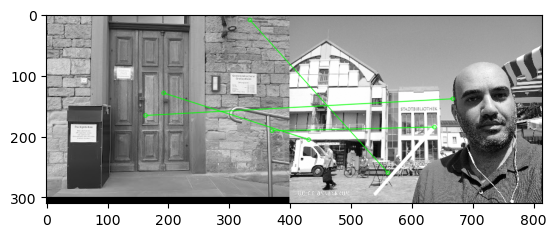

- Not enough landmark matches are found - 6/10
> Capture img: imgs/captured/1719395070417.jpg


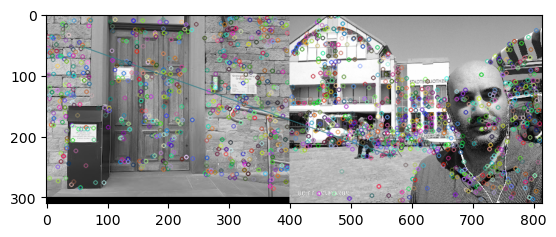

- Not enough landmark matches are found - 1/10
> Capture img: imgs/captured/1719395070429.jpg


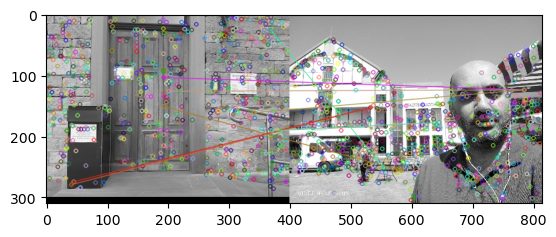

- Not enough landmark matches are found - 8/10
> Capture img: imgs/captured/1719395070390.jpg


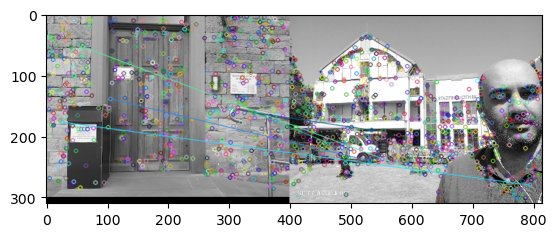

- Not enough landmark matches are found - 5/10


In [71]:
# Testing check_bg_similarity(...) with DIFFERENT BG
plc_id = "ChIJNbIcVIoTvUcR-_byld0yG0g"
plc_id = "ChIJb8TSLkVGc0ERxrMn1Qjx8r0" 
captured_imgs_dir = Path("imgs") / "captured"
captured_img_filepaths = captured_imgs_dir.glob("*.*")
for captured_img_path in captured_img_filepaths:
    # Only accept .jpg, .jpeg, .png extensions
    if not captured_img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
        continue
    print("> Capture img:", captured_img_path)
    bg_similar, msg = check_bg_similarity(captured_img_path, plc_id, plot=True)
    print("-", msg)

In [73]:
def validate_usr_in_plc(captured_img_path, val_usr_name, plc_id):
    """Validates User's face in a saved photo captured in a specific place using our trained CV2 classifier

    Parameters
    ----------
    captured_img_path: str
        The path to the saved captured image for the user in front of validation place
    val_usr_name: str
        The name of user being validated. This will be used by face classifier
    plc_id: str
        The id of the place (Google Place) with which we want to check background similarity

    Returns
    -------
    validated: bool
        Wether validation is successful
    msg: str:
        The face in place validation output msg
    """
    
    validated = False
    msg = ""
    
    # 1- Validated user in pic using our OpenCV2 trained model
    user_face_validated, m = validate_face_in_img(captured_img_path, val_usr_name)
    if not user_face_validated:
        msg = "Can't recognise {0}'s face. Please make sure the face is not too small and that it doesn't appear cropped in the captured image.".format(val_usr_name)
        return validated, msg
    
    # 2- Check if the captured image has a background that is similar to the place image provided by Google Places
    bg_similar, m = check_bg_similarity(captured_img_path, plc_id)
    if not bg_similar:
        msg = "The captured photo doesn't seem similar to the selected photo from Google Places for this place. Can you try showing more landmarks in the taken photo?"
        return validated, msg
    
    validated = True
    msg = "Great job! Validated"
    
    return validated, msg

In [74]:
val_usr_name = "Omar"
plc_id = "ChIJo7uyXuVHvUcRJnq0SFwXuGc"
captured_imgs_dir = Path("imgs") / "captured"
captured_img_filepaths = captured_imgs_dir.glob("*.*")
for captured_img_path in captured_img_filepaths:
    # Only accept .jpg, .jpeg, .png extensions
    if not captured_img_path.suffix.lower() in [".jpg", ".jpeg", ".png"]:
        continue
    print("> Capture img:", captured_img_path)
    validated, msg = validate_usr_in_plc(captured_img_path, val_usr_name, plc_id)
    print("\t-", "Face & Place Validated" if validated else "NOT validated", " - [Msg]", msg)

> Capture img: imgs/captured/1719395070404.jpg
	- Face & Place Validated  - [Msg] Great job! Validated
> Capture img: imgs/captured/1719395070417.jpg
	- Face & Place Validated  - [Msg] Great job! Validated
> Capture img: imgs/captured/1719395070429.jpg
	- Face & Place Validated  - [Msg] Great job! Validated
> Capture img: imgs/captured/1719395070390.jpg
	- NOT validated  - [Msg] Can't recognise Omar's face. Please make sure the face is not too small and that it doesn't appear cropped in the captured image.
